In [46]:
import pandas as pd
import gensim
from gensim import corpora
from pprint import pprint
import spacy
import re     
# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import pickle
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from Preprocess import Preprocess
from Viz import Viz
from LDA import LDA
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /Users/shruti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/shruti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [89]:
def word_freq(data, stopwords,n):

    import numpy as np
    import seaborn as sns
    #data_lem_joined = [' '.join(words) for words in self.lemmatize(data)] 
    count_vectorizer = CountVectorizer(stop_words=stopwords)
    count_data = count_vectorizer.fit_transform(data)
    words = count_vectorizer.get_feature_names()
    w = words
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]

    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    count_dict = [a for a in count_dict if a[1]]
    words = [w[0] for w in count_dict][0:n]
    counts = [w[1] for w in count_dict][0:n]
    x_pos = np.arange(len(words)) 
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
        
    return count_dict, count_data, w

# 1. BIO

In [105]:
f1 = '2010/BIO.xlsx'
f1 = pd.read_excel(f1)
f1.to_csv('2010/BIO.csv')

In [106]:
f1 = '2010/BIO.csv'

['research', 'datum', 'specie', 'function', 'use', 'information', 'tool', 'problem', 'this_project', 'dynamic', 'identify', 'impact', 'model', 'new', 'training', 'change', 'method', 'protein_function', 'this_project_be', 'university', 'develop', 'experiment', 'image', 'large', 'protein', 'scientist', 'structural_organization', 'algorithm', 'biology', 'computational', 'different', 'include', 'know', 'network', 'a_qualitative_subjectivity_while', 'a_wide_systematically_link', 'data_into_biological_knowledge', 'discovery', 'evolutionary', 'images_supporting_a_wide', 'inference_method_transforming_image', 'knowledgethis_project_will_develop', 'machine_learne', 'machine_learning', 'methodologies_for_shape_analysis', 'morphological_variation_underlying_biological', 'motoneuron', 'often_inaccessible_not_easily', 'process', 'program']


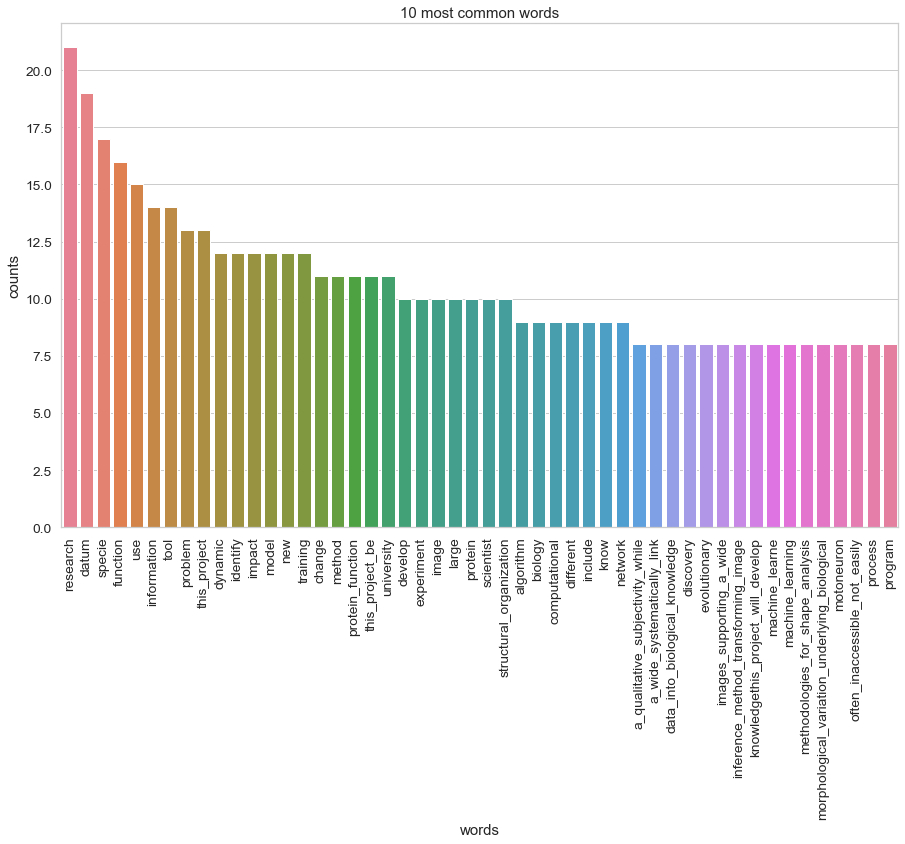

In [107]:
p1= Preprocess(f1)
lem1, words = p1.clean_lemmatize(True, 50)

In [108]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# custom_stop = ['research', 'project', 'method', 'develop', 'new', 'function', 'tool', 'datum', 'analysis', 'problem',
#               'information', 'use', 'model', 'development', 'student', 'set', 'study', 'framework', 'university',
#               'biologist', 'focus', 'primary', 'provide', 'traning', 'wide', 'impact', 'integrate', 'scientist', 
#                'support', 'approach', 'goal', 'methodology', 'know', 'objective']
custom_stop = ['scientist', 'project','research', 'method', 'use', 'tool', ',many', 'new', 'many'
               'provide', 'study', 'develop','student', 'biological', 'enormous', 'important',
               'biologist','produce', 'analysis', 'team', 'development', 'field', 'work', 'make',
               'identify', 'model', 'science', 'approach', 'technology', 'animal', 'relate', 'great_challenge,'
               'challenge_discover', 'extend_adapt', 'fill_important','include', 'information', 'life', 'system',
              'draw', 'extend', 'future', 'provide', 'community', 'understand', 'behavior']

# custom_stop = ['model', 'datum', 'research', 'method', 'new', 'use', 'application','problem', 
#                'include', 'provide', 'study', 'science', 'develop', 'approach',
#                'information', 'learn', 'scientist', 'work', 'area', 'challenge', 'important', 'make', 'scientific', 
#                'algorithm', 'analyze', 'complex', 'improve', 'involve', 'program', 'statistic', 'theory', 
#                'this_project', 'tree', 'allow', 'design', 'different',  
#                'project', 'structure', 'tool', 'user', 'system', 'broad', 'many']
stop_words = stop_words + custom_stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
words = ' '.join(word for word in sum(lem1, []))

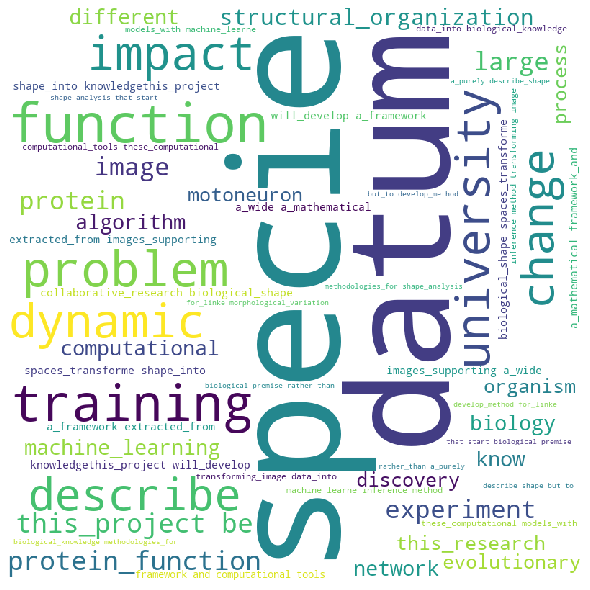

In [110]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = stop_words,      
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [111]:
m = []
for a in lem1:
    m.append(' '.join(a))

/Users/shruti/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['challenge_discover', 'great_challenge', 'many'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


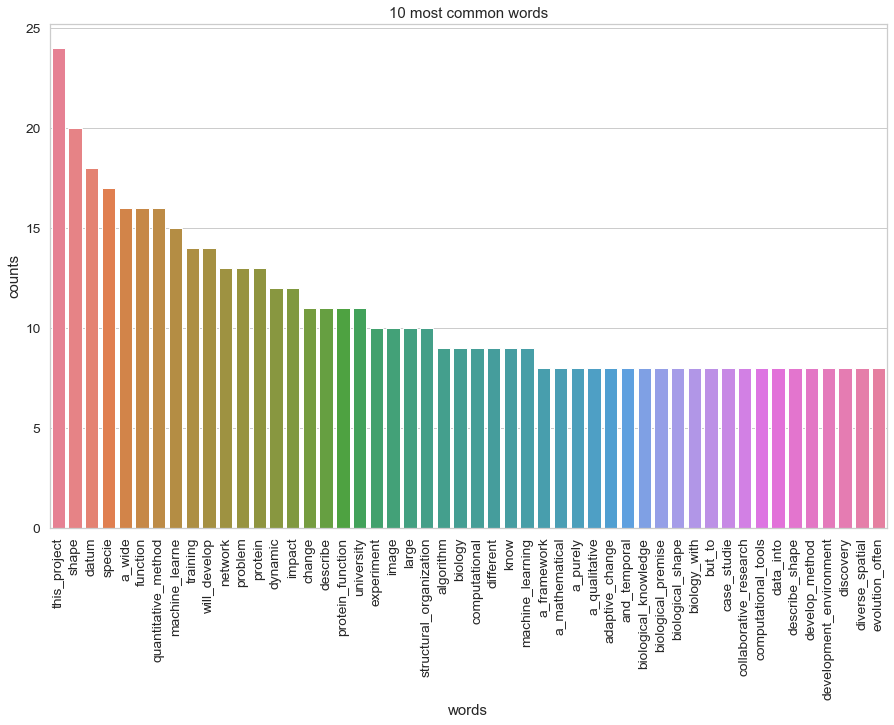

In [112]:
counts, count_data, w = word_freq(m, stop_words, 50)

In [62]:
counts

[('statistical', 18.0),
 ('computational', 16.0),
 ('high_dimensional', 12.0),
 ('galaxy', 11.0),
 ('cloud', 10.0),
 ('molecular', 10.0),
 ('matrix', 9.0),
 ('polynomial', 9.0),
 ('representation', 9.0),
 ('signal', 9.0),
 ('data', 8.0),
 ('field', 8.0),
 ('impact', 8.0),
 ('machine_learne', 8.0),
 ('mathematic', 8.0),
 ('slt', 8.0),
 ('sparse', 8.0),
 ('student', 8.0),
 ('algebraic_geometry', 7.0),
 ('also', 7.0),
 ('analysis', 7.0),
 ('biology', 7.0),
 ('classification', 7.0),
 ('community', 7.0),
 ('large', 7.0),
 ('optimization', 7.0),
 ('propose', 7.0),
 ('random', 7.0),
 ('sample', 7.0),
 ('small', 7.0),
 ('undergraduate', 7.0),
 ('variety', 7.0),
 ('way', 7.0),
 ('accurate', 6.0),
 ('advance', 6.0),
 ('can_be', 6.0),
 ('computer_vision', 6.0),
 ('current', 6.0),
 ('dimension', 6.0),
 ('direction', 6.0),
 ('distribution', 6.0),
 ('diverse', 6.0),
 ('estimate', 6.0),
 ('feature', 6.0),
 ('fundamental', 6.0),
 ('graduate_student', 6.0),
 ('high', 6.0),
 ('image', 6.0),
 ('main', 6.

In [113]:
freq = [counts[i][1]  for i in range (0, len(counts))]

In [114]:
values, countss = np.unique(freq, return_counts=True)

<BarContainer object of 20 artists>

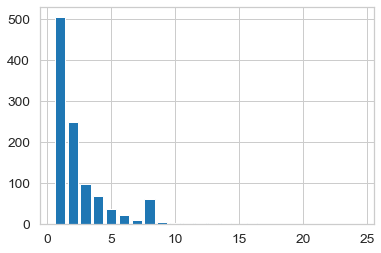

In [115]:
plt.bar(values, countss)

In [ ]:
df = pd.DataFrame(counts)
df.to_excel('2010/BIO_freq.xlsx')

In [116]:
tf_idf = pd.DataFrame(count_data.toarray())
tf_idf

,0,1,2,3,4,5,6,7,8,9,...,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [117]:
kmeans = KMeans(n_clusters=5).fit(count_data)

In [118]:
len(w)

1081

In [119]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats, word):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        print(len(x_means))
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        best_features = [(word[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    import seaborn as sns
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [120]:
final_df_array = tf_idf.to_numpy()
prediction = kmeans.predict(tf_idf)

1081
1081
1081
1081
1081


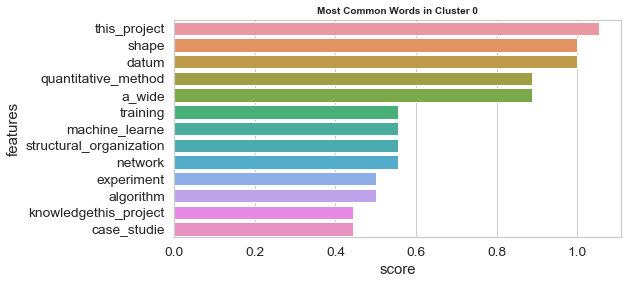

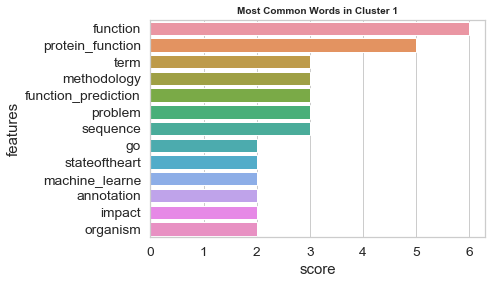

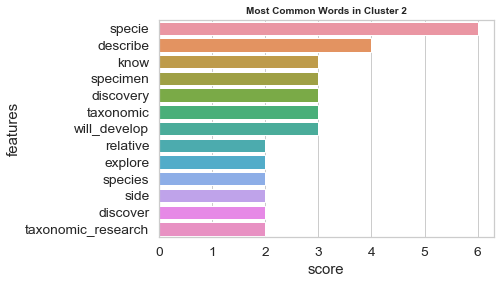

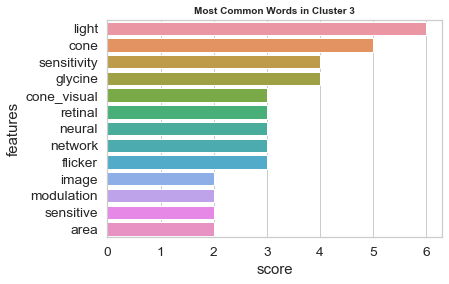

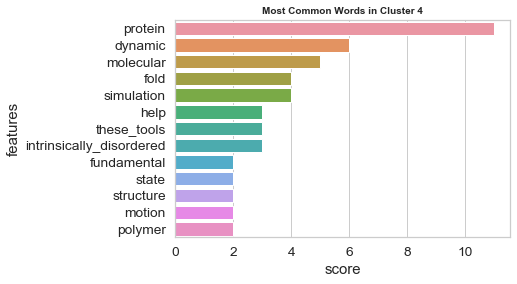

In [121]:
dfs = get_top_features_cluster(final_df_array, prediction, 20, w)
plotWords(dfs, 13)

In [37]:
def concordanceBySentence(Ngram, rawText):
# Input: Takes raw text, tekeonzes it into sentences and tries to find the
# NGram that was passed in.
#
# Output: returns a list of sentences containing that NGram.
 
# This variable holds the list of sentences matching the topNGram, if any.
 
    matchingSentenceList = []
 
    print('\nWhole sentence concordance for the N-gram: %s' % (Ngram))
 
    sentenceList = rawText#nltk.sent_tokenize(rawText)

    Ngram = Ngram.lower()
 
    # Get a sentence then see if that Ngram exists in that sentence.
    # if it is then append the sentence to the sentence list return variable.
    for sentence in sentenceList:
        if Ngram in sentence.lower():
            matchingSentenceList.append(sentence)
 
    if (len(matchingSentenceList) == 0):
        print('No sentences were found with the N-gram: %s \n' % (Ngram))
 
    return matchingSentenceList

In [38]:
s = concordanceBySentence('computer vision', m)


Whole sentence concordance for the N-gram: computer vision


In [39]:
s

['have long be recognize convincing pictorial representation object can sometimes be achieve draw just salient image phenomenon be really quite remarkable give line draw effectively strip away almost variation color shade be ordinarily available natural scene somehow artist create such drawing be capture essential information perceptual recognition just simple stroke well structured line drawing be easily interpret observer ability_to create drawing can require considerable artistic skill indeed almost half century research computer vision there be exist algorithm that_can duplicate performance competent human artist this_project jame todd student ohio state university will investigate how human_observer perceptually identify different type image contour shadow corner occlusion group will_also examine image be perceptually most_important create pictorial representation object stimulus study will include drawing artist vary amount training ask produce line drawing object know d structur

# SBE

In [30]:
f1 = '2010/SBE.xlsx'
f1 = pd.read_excel(f1)
f1.to_csv('2010/SBE.csv')

['research', 'information', 'use', 'datum', 'patient', 'different', 'child', 'work', 'analysis', 'area', 'team', 'this_project', 'construct', 'include', 'study', 'develop', 'science', 'web', 'belief', 'create', 'field', 'group', 'interaction', 'knowledge', 'language', 'possible', 'search', 'tool', 'visual', 'algorithm', 'cognitive', 'design', 'enable', 'high', 'important', 'new', 'scientific', 'student', 'support', 'available', 'behavior', 'behavioral', 'examine', 'gesture', 'human', 'post', 'problem', 'process', 'provide', 'researcher']


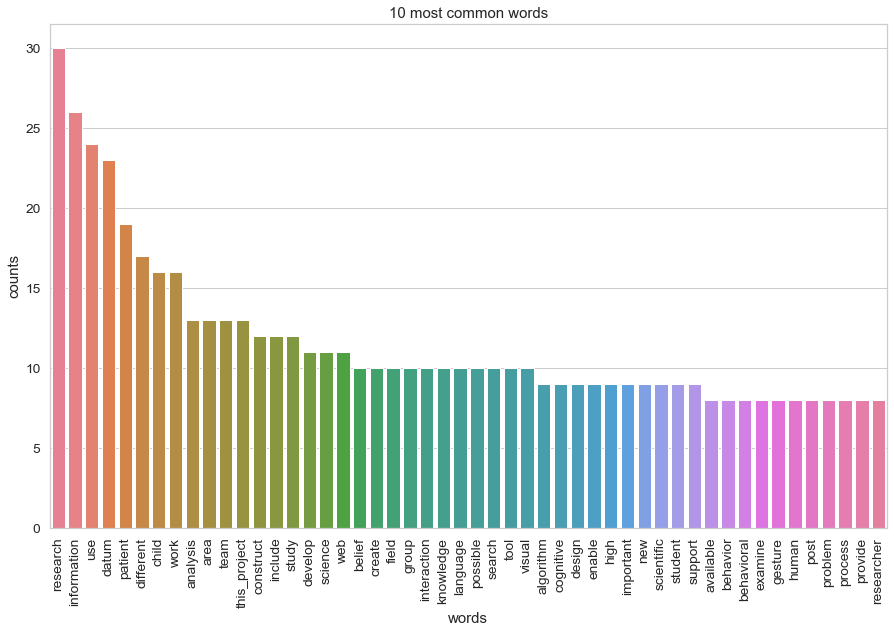

In [31]:
f1 = '2010/SBE.csv'

p1= Preprocess(f1)
lem1, words = p1.clean_lemmatize(True, 50)

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
custom_stop = ['research', 'information', 'use', 'datum','different', 'work', 'analysis', 
               'area', 'team', 'this_project', 'construct', 'include', 'study', 'develop', 'science', 'web', 
               'belief', 'create', 'field', 'group', 'interaction', 'knowledge', 'language', 'possible', 'search', 
               'tool', 'algorithm', 'cognitive', 'design', 'enable', 'high', 'important', 'new', 
               'scientific', 'student', 'support', 'available','examine', 'gesture', 
               'human', 'post', 'problem', 'process', 'provide', 'researcher']
stop_words = stop_words + custom_stop

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shruti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
words = ' '.join(word for word in sum(lem1, []))

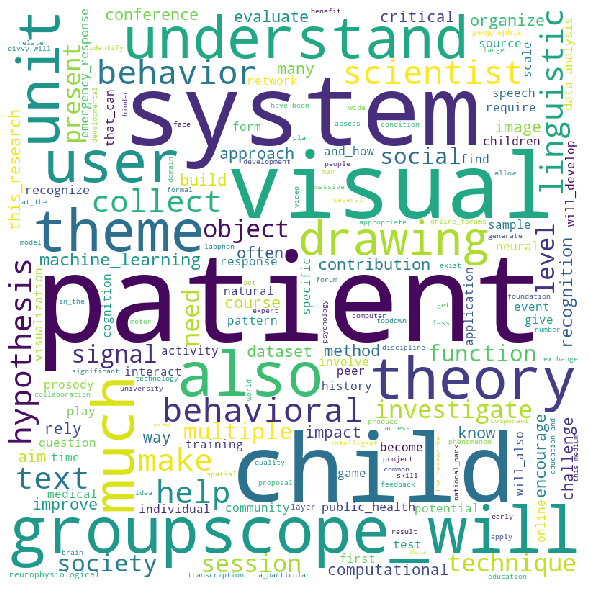

In [35]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = stop_words,      
                min_font_size = 10).generate(words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

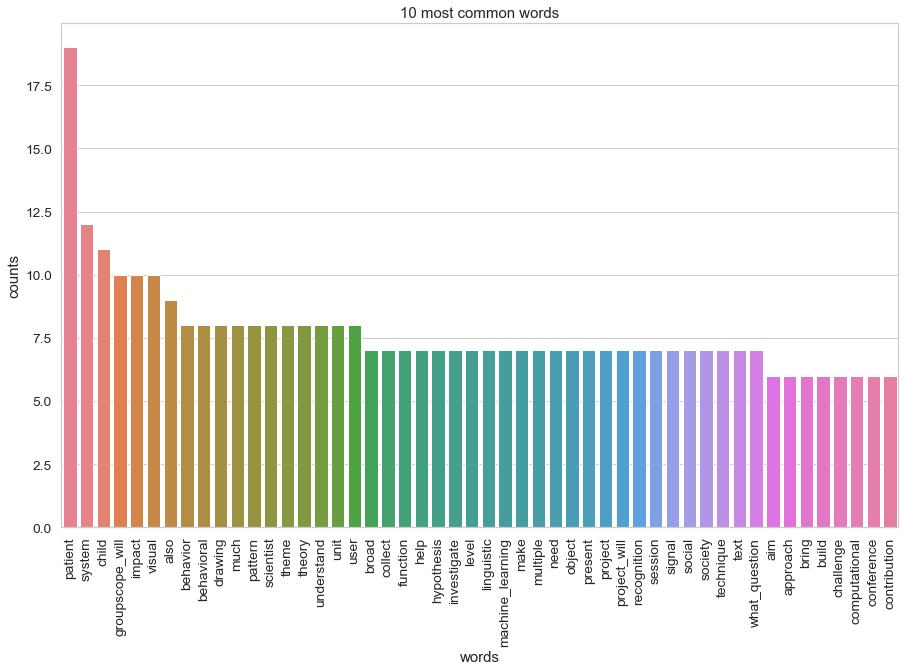

<BarContainer object of 13 artists>

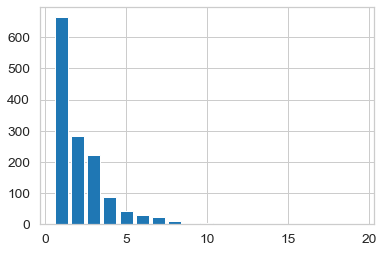

In [36]:
m = []
for a in lem1:
    m.append(' '.join(a))

counts = word_freq(m, stop_words, 50)
counts

import numpy as np
freq = [counts[i][1]  for i in range (0, len(counts))]

values, countss = np.unique(freq, return_counts=True)

plt.bar(values, countss)

In [ ]:
df = pd.DataFrame(counts)
df.to_excel('2010/SBE_freq.xlsx')